<a href="https://colab.research.google.com/github/sanketgawali123/-NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/Copy_of_NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description


### Mounting google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')


import matplotlib.mlab as mlab
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
%matplotlib inline

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

%matplotlib inline

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Capstone Project/Netflix Movies and TV Shows Clustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
data = pd.read_csv(path)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
data.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [ ]:
data.shape

(7787, 12)

In [ ]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Dataset Summary

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,7787.0,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0


In [ ]:
data.describe(include = 'O').T

,count,unique,top,freq
show_id,7787,7787,s1,1
type,7787,2,Movie,5377
title,7787,7787,3%,1
director,5398,4049,"Raúl Campos, Jan Suter",18
cast,7069,6831,David Attenborough,18
country,7280,681,United States,2555
date_added,7777,1565,"January 1, 2020",118
rating,7780,14,TV-MA,2863
duration,7787,216,1 Season,1608
listed_in,7787,492,Documentaries,334


### Missing Value

In [ ]:
data.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
from pandas.core.resample import date_range
# Handling Missing Value
data['director'].fillna('unknown', inplace = True)
data['cast'].fillna('unknown', inplace = True)
data['country'].fillna('nuknown', inplace = True)
data['date_added'].fillna('unknown', inplace = True)
data['rating'].fillna('unknown', inplace = True)

Converting date_added to datetime format


In [ ]:
import datetime as dt

In [ ]:
def date(row):
    a = row['date_added']
    if 'unknown' not in a:
        month = a.split()[0]
        year = a.split()[-1]
        day = a.split()[1].split(',')[0]
        a = dt.datetime.strptime(f'{month[:3]} {day} {year}', '%b %d %Y')
        return a
    else:
        return np.nan

data['date_added'] = data.apply(lambda x: date(x), axis = 1)

### Feaature ENGINEERING LISTED_IN

Genres are extracted and re-defined accordingly. TV and Movie genres are separately defined. These are combined. Topics like International TV Shows are removed as it could bring in a bias by displaying content in reference to American movies.

In [ ]:
netflix = data.copy()

In [ ]:
netflix['listed_in'] = netflix.listed_in.apply(lambda row: row.split(', '))
netflix.explode('listed_in')['listed_in'].unique()

array(['International TV Shows', 'TV Dramas', 'TV Sci-Fi & Fantasy',
       'Dramas', 'International Movies', 'Horror Movies',
       'Action & Adventure', 'Independent Movies', 'Sci-Fi & Fantasy',
       'TV Mysteries', 'Thrillers', 'Crime TV Shows', 'Docuseries',
       'Documentaries', 'Sports Movies', 'Comedies', 'Anime Series',
       'Reality TV', 'TV Comedies', 'Romantic Movies',
       'Romantic TV Shows', 'Science & Nature TV', 'Movies',
       'British TV Shows', 'Korean TV Shows', 'Music & Musicals',
       'LGBTQ Movies', 'Faith & Spirituality', "Kids' TV",
       'TV Action & Adventure', 'Spanish-Language TV Shows',
       'Children & Family Movies', 'TV Shows', 'Classic Movies',
       'Cult Movies', 'TV Horror', 'Stand-Up Comedy & Talk Shows',
       'Teen TV Shows', 'Stand-Up Comedy', 'Anime Features',
       'TV Thrillers', 'Classic & Cult TV'], dtype=object)

In [ ]:
replacing_genre = {'International TV Shows': '-',
                   'TV Dramas': 'Drama',
                   'TV Sci-Fi & Fantasy': 'SciFiFantasy',
                   'Dramas': 'Drama' ,
                   'International Movies': '-',
                   'Horror Movies': 'Horror',
                   'Action & Adventure': 'ActionAdventure',
                   'Independent Movies': '-',
                   'Sci-Fi & Fantasy': 'SciFiFantasy',
                   'TV Mysteries': 'Mystery',
                   'Thrillers': 'Thriller',
                   'Crime TV Shows': 'Crime',
                   'Docuseries': 'Documentary',
                   'Documentaries': 'Documentary', 'Sports Movies': 'Sports',
                   'Comedies':'Comedy',
                   'Anime Series': 'Anime',
                   'Reality TV': 'Reality',
                   'TV Comedies': 'Comedy',
                   'Romantic Movies': 'Romance',
                   'Romantic TV Shows': 'Romance',
                   'Science & Nature TV': 'Science',
                   'Movies': '-',
                   'British TV Shows': '-',
                   'Korean TV Shows': '-',
                   'Music & Musicals': 'Music',
                   'LGBTQ Movies': 'LGBTQ',
                   'Faith & Spirituality': 'Spirituality',
                   "Kids' TV": 'Kids',
                   'TV Action & Adventure': 'ActionAdventure',
                   'Spanish-Language TV Shows': '-',
                   'Children & Family Movies': 'Family',
                   'TV Shows': '-',
                   'Classic Movies': 'Classic',
                   'Cult Movies': 'Cult',
                   'TV Horror': 'Horror',
                   'Stand-Up Comedy & Talk Shows':'Comedy, TalkShow',
                   'Teen TV Shows': 'Teen', 'Stand-Up Comedy':'Comedy',
                   'Anime Features':'Anime',
                   'TV Thrillers': 'Thriller',
                   'Classic & Cult TV':'Classic, Cult'}

In [ ]:
def genre_replace(row, replacing_genre = replacing_genre):
    new_text = []
    for word in (row['listed_in']):
        if word in replacing_genre:
            if '-' not in replacing_genre[word]:
                new_text.append(replacing_genre[word])
        else:
            print(word, 'not presentin dictionary') 
    return(', '.join(new_text)) 

data['Genres'] = netflix.apply(lambda row: genre_replace(row), axis=1)
data['Genres'] = data['Genres'].apply(lambda row: row.split(', '))

### Exploratory Data Analysis

In [ ]:
data.explode('Genres')['Genres'].unique()

array(['Drama', 'SciFiFantasy', 'Horror', 'ActionAdventure', 'Mystery',
       'Thriller', 'Crime', 'Documentary', 'Sports', 'Comedy', 'Anime',
       'Reality', 'Romance', 'Science', '', 'Music', 'LGBTQ',
       'Spirituality', 'Kids', 'Family', 'Classic', 'Cult', 'TalkShow',
       'Teen'], dtype=object)

Histogram plot of release dates of shows/movies on Netflix

<Figure size 1080x720 with 0 Axes>

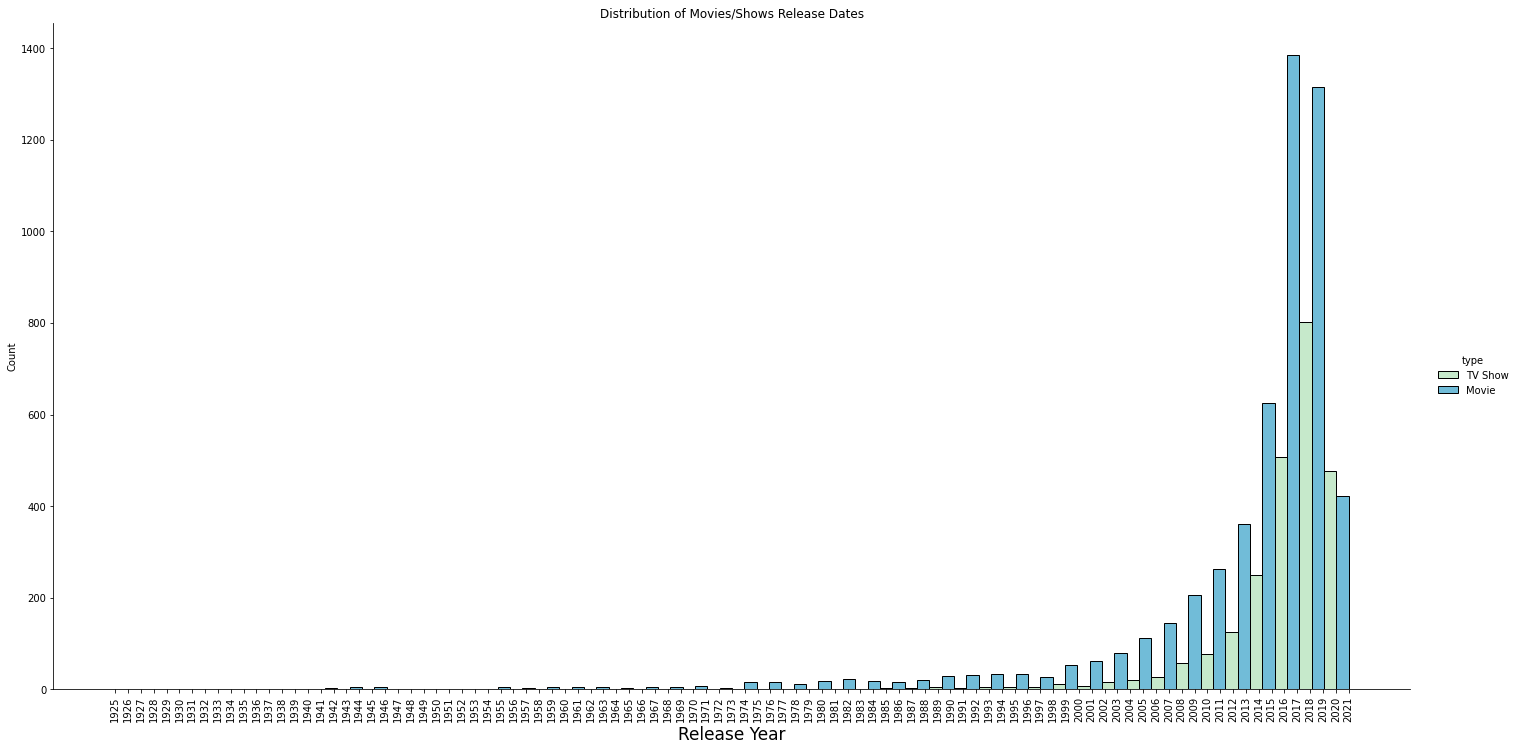

In [ ]:
netflix = plt.figure(figsize = (15,10))
netflix = sns.displot(x = 'release_year', hue = 'type', data = data, kind = 'hist', height = 10, aspect = 2, bins = 50, multiple = 'dodge', palette = 'GnBu')
netflix = plt.xticks(ticks = np.arange(data.release_year.min(), data.release_year.max() + 1, 1), rotation = 90)
netflix = plt.title('Distribution of Movies/Shows Release Dates')
netflix = plt.xlabel('Release Year', size = 17)

### Oservations :-

Most Movies streaming on the platform were released after 2010

Most  TV Shows streaming on the platform were released after 2015

The year 2017 had highest number of Movie and TV show releases on the platform

Histogram plot of dates of number of shows/movies added by the Streaming giant

In [ ]:
data['date_added'].dt.year.max()

2021.0

<Figure size 1440x720 with 0 Axes>

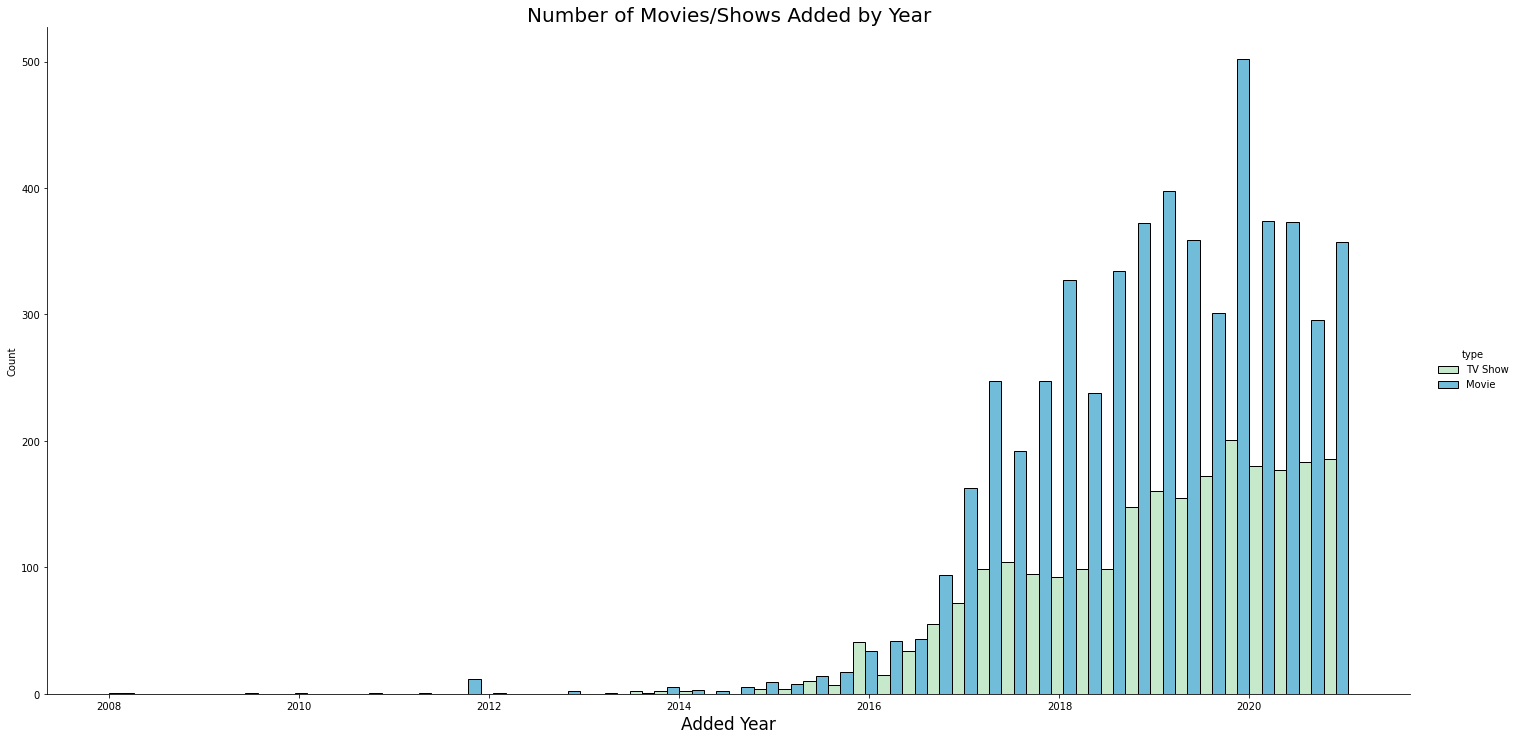

In [ ]:
netflix = plt.figure(figsize = (20,10))
netflix = sns.displot(x = data['date_added'], hue = 'type', data = data, kind = 'hist', height = 10, aspect = 2, bins = 50, multiple = 'dodge', palette = 'GnBu')
netflix = plt.title('Number of Movies/Shows Added by Year', size = 20)
netflix = plt.xlabel('Added Year', size = 17)

### Observations :-
Netflix began adding videos to the platform from 2008

The streaming giant started aggressively adding movies and TV shows from 2017

More movies are added as compared to TV shows

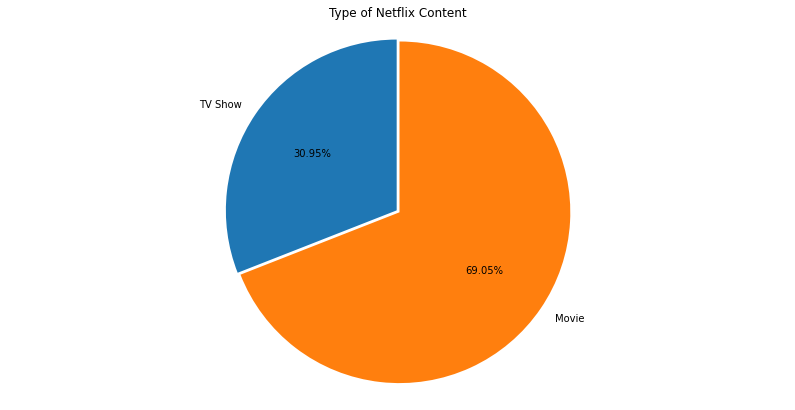

In [ ]:
#Plotting pie chart on type feature
plt.figure(figsize = (14, 7))
labels=['TV Show', 'Movie']
plt.pie(data['type'].value_counts().sort_values(), labels = labels,
        explode = [0.01,0.01], autopct = '%1.2f%%', startangle = 90)
plt.title('Type of Netflix Content')
plt.axis('equal')
plt.show()

### Type of Videos on Netflix

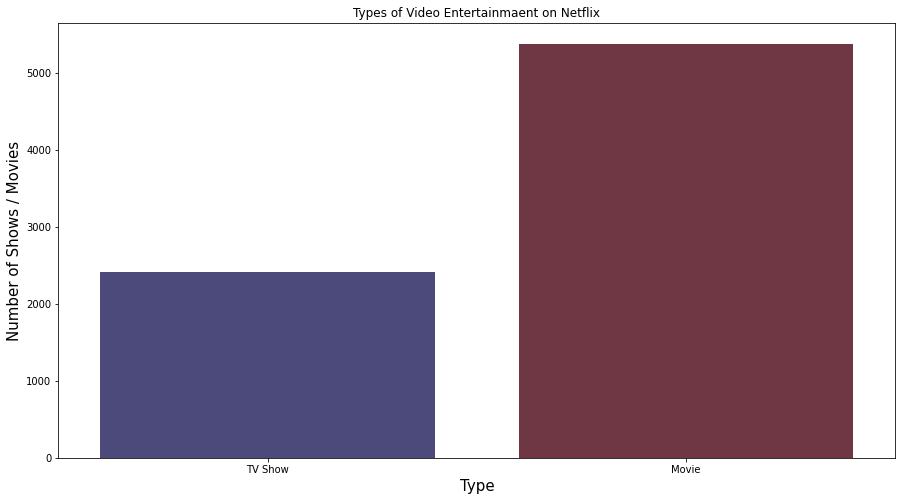

In [ ]:
netflix = plt.figure(figsize = (15,8))
netflix = sns.countplot(x = data['type'], data = data, palette = 'icefire')
netflix = plt.title('Types of Video Entertainmaent on Netflix')
netflix = plt.xlabel('Type', size = 15)
netflix = plt.ylabel('Number of Shows / Movies', size = 15)
plt.show()

*Observations :-*

There are almost twice as many movies as TV shows on Netflix.

### Different Rating on the Platform

Text(0, 0.5, 'Number of Videos')

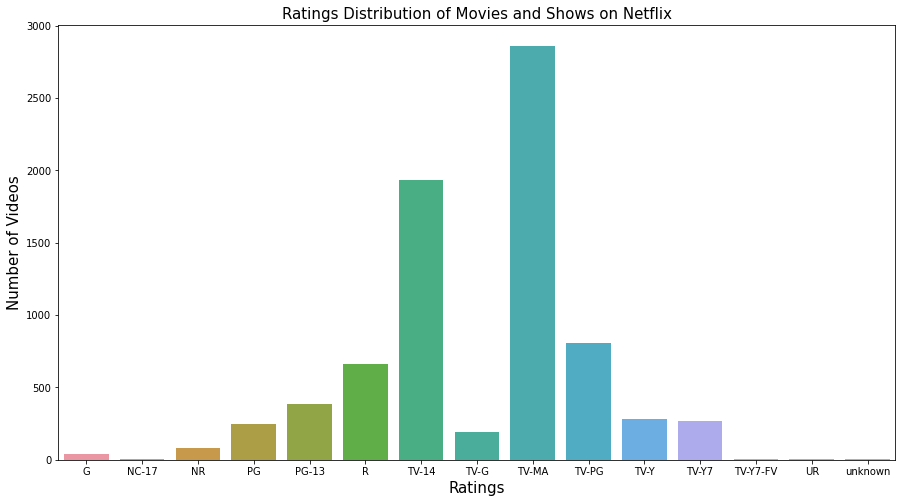

In [ ]:
df = data.groupby('rating').agg({'show_id':'count'}).reset_index()
plt.figure(figsize = (15,8))
sns.barplot(x = df['rating'], y = df['show_id'])
plt.title('Ratings Distribution of Movies and Shows on Netflix', size = 15)
plt.xlabel('Ratings', size = 15)
plt.ylabel('Number of Videos', size = 15)

### Observations :-

Most content on Netflix is rated for Mature Audiences and over 14 years old

### Top 10 Countries that produced content on Netflix

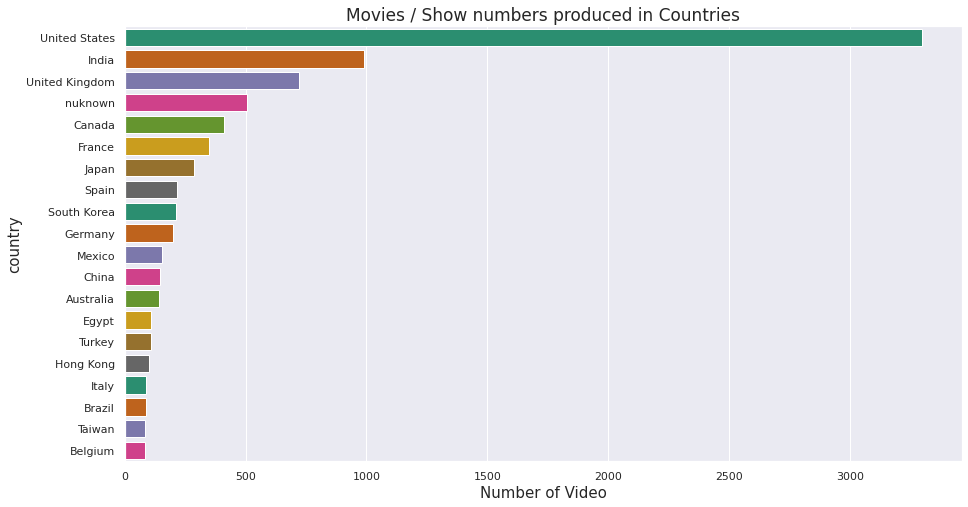

In [ ]:
netflix = data[data.country != 'unknown'].loc[:,['show_id','title','country','listed_in']].copy()
countrylist = (netflix['country'].to_list())
newlist = []
for country in countrylist:
    if ',' in country:
        netflix = country.split(', ')
        newlist = newlist + netflix
    else:
        newlist.append(country)

country_list = pd.DataFrame({'country' : newlist, 'id':np.arange(0, len(newlist),1)})
netflix = country_list.groupby('country').agg({'id':'count'}).sort_values('id',ascending = False).head(20).reset_index()
plt.figure(figsize = (15,8))
#sns.barplot(x = 'country', y = 'id', data = netflix, palette = "Dark2")
#plt.title('Movies / Show numbers produced in Countries', size = 17)
#plt.xlabel('country', size = 15)
#plt.xticks(rotation=90, fontsize = 10, fontweight = "bold")
#plt.ylabel('Number of Video', size = 15)
sns.barplot(y = 'country', x ='id', data = netflix, palette = "Dark2")
plt.title('Movies / Show numbers produced in Countries', size = 17)
plt.xlabel('Number of Video', size = 15)
plt.ylabel('country', size = 15)

top10countries = country_list.groupby('country').agg({'id':'count'}).sort_values('id',ascending = False).head(10).reset_index()['country'].unique()

### Observations :-

Top Countries in Netflix are:

1.United States

2.India

3.United Kingdom

4.Canada

5.France

------------------------------------

### Top Genres on Netflix

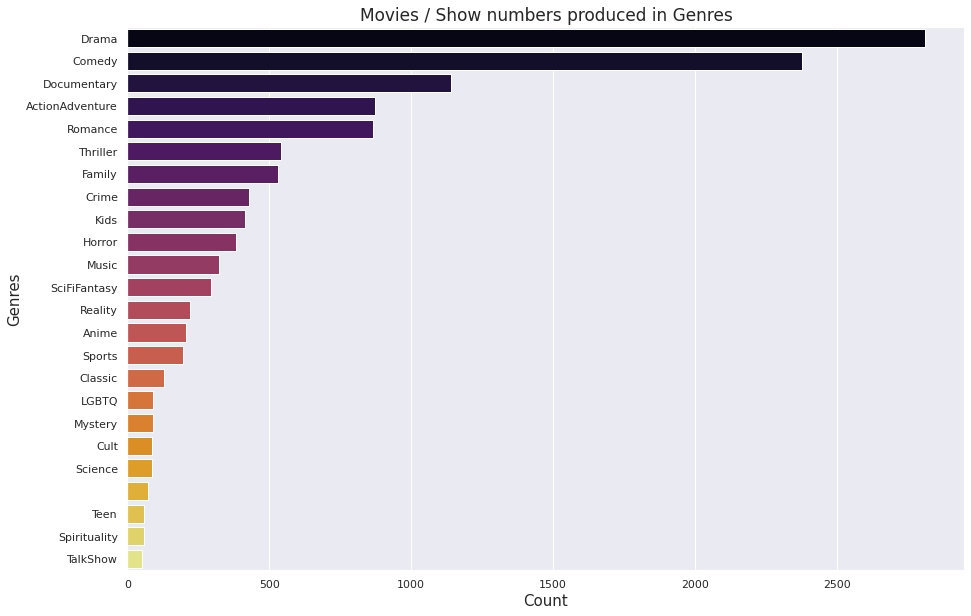

In [ ]:
netflix = data.loc[:,['show_id','title','country','Genres']].copy()
netflix = netflix.explode('Genres')
genre_list = netflix.Genres.unique()
group = netflix.groupby('Genres').agg(count = ('show_id','count')).sort_values('count',ascending = False).reset_index()
plt.figure(figsize=(15,10))
#sns.barplot(x = 'Genres', y = 'count', data = group, palette = 'inferno')
#plt.title('Movies / Show numbers produced in Genres', size = 17)
#plt.xlabel('Genres', size = 15)
#plt.xticks(rotation=90, fontsize = 10, fontweight = "bold")
#plt.ylabel('Count', size = 15)
sns.barplot(y = 'Genres', x = 'count',data = group , palette='inferno')
plt.title('Movies / Show numbers produced in Genres', size = 17)
plt.xlabel('Count', size = 15)
plt.ylabel('Genres', size = 15)
plt.show()

Observations :-

Top Genres in Netflix are:
        
1.Drama
   
2.Comedy
    
3.Documentary
    
4.Action and Adventure
    
5.Romance

In [ ]:
top15genres = group.head(15)['Genres'].to_list()

Top most Director on Netflix

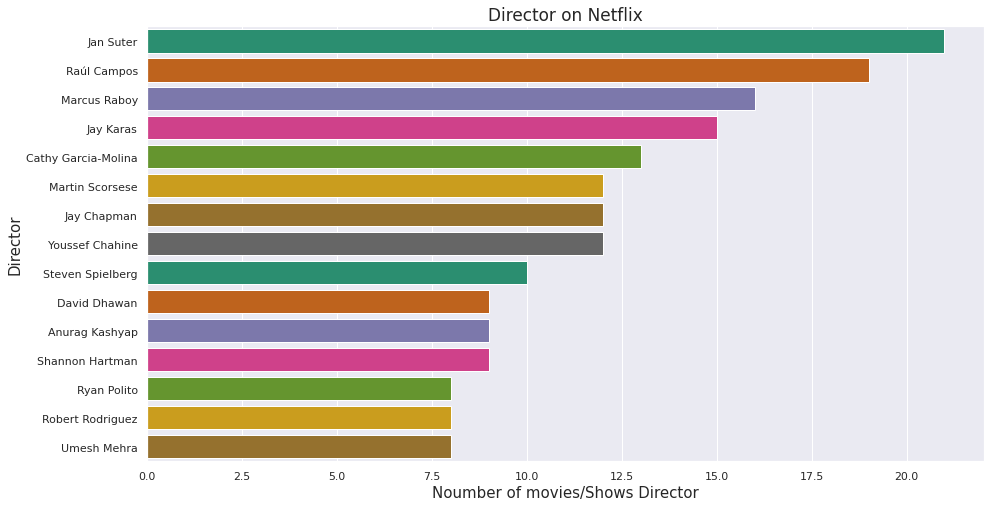

In [ ]:
netflix = data[data.director != 'unknown'].loc[:,['show_id', 'title', 'director', 'cast']].copy()
director = (netflix['director'].to_list())
newlist = []
for genre in director:
    if ',' in genre:
        netflix = genre.split(', ')
        newlist = newlist + netflix
    else:
        newlist.append(genre)
country_list = pd.DataFrame({'Director':newlist, 'id':np.arange(0, len(newlist), 1)})
netflix = country_list.groupby('Director').agg({'id':'count'}).sort_values('id', ascending = False).reset_index().head(15)
plt.figure(figsize = (15,8))
#sns.barplot(x = 'Director', y = 'id', data = netflix, palette = "Dark2")
#plt.title('Director on Netflix', size = 17)
#plt.xlabel('Director', size = 15)
#plt.xticks(rotation=90, fontsize = 10, fontweight = "bold")
#plt.ylabel('Noumber of movies/Shows Director', size = 15)
netflix = sns.barplot(y = 'Director', x = 'id', data = netflix, palette = "Dark2")
netflix = plt.title('Director on Netflix', size = 17)
netflix = plt.xlabel('Noumber of movies/Shows Director', size = 15)
netflix = plt.ylabel('Director', size = 15)

top10director = country_list.groupby('Director').agg({'id':'count'}).sort_values('id',ascending = False).reset_index().head(10)['Director'].to_list()

### Observations :-

Top Directors on Netflix are:

1.Jan Suter

2.Raul Campos

3.Marcus Raboy

4.Jay Karas

5.Cathy Garcia-Molina


### Top Actors on Netflix

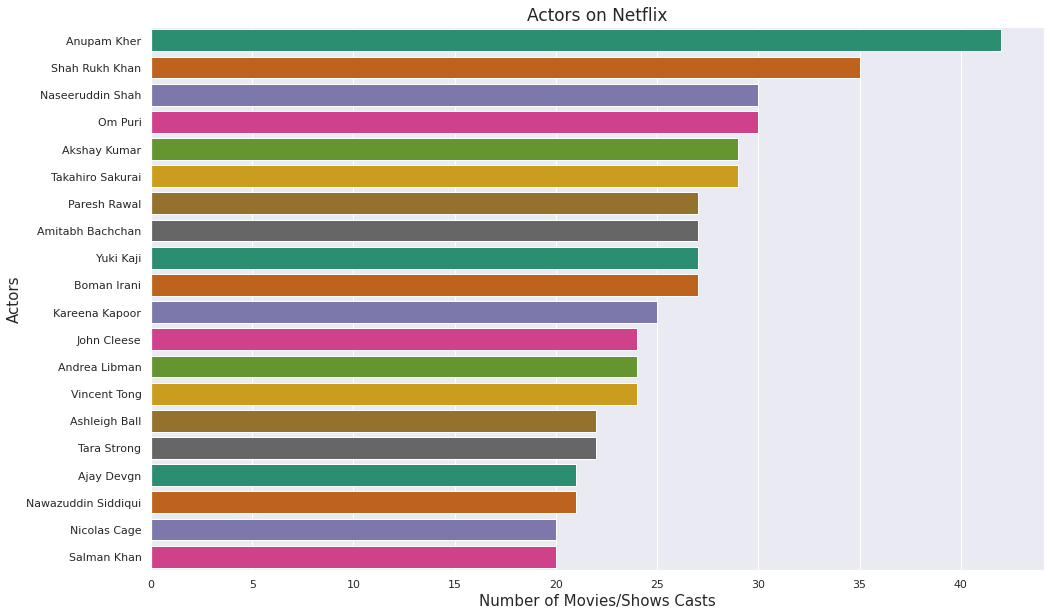

In [ ]:
netflix = data[data.cast != 'unknown'].loc[:,['show_id','title','director','cast']].copy()
cast = (netflix['cast'].to_list())

newlist = []
for genre in cast:
    if ',' in genre:
        netflix = genre.split(', ')
        newlist = newlist + netflix
    else:
        newlist.append(genre)

country_list = pd.DataFrame({'Actor':newlist, 'id':np.arange(0, len(newlist), 1)})

netflix = country_list.groupby('Actor').agg({'id':'count'}).sort_values('id',ascending = False).head(20).reset_index()
plt.figure(figsize = (16,10))
#sns.barplot(x = 'Actor', y = 'id', data = netflix, palette = "Dark2")
#plt.title('Actors on Netflix', size = 17)
#plt.xlabel('Actors', size = 15)
#plt.xticks(rotation=90, fontsize = 10, fontweight = "bold")
#plt.ylabel('Number of Movies/Shows Casts', size = 15)
sns.barplot(x = 'id', y = 'Actor', data = netflix, palette = "Dark2")
plt.title('Actors on Netflix', size = 17)
plt.xlabel('Number of Movies/Shows Casts', size = 15)
plt.ylabel('Actors', size = 15)

top10actors = country_list.groupby('Actor').agg({'id':'count'}).sort_values('id', ascending = False).head(20).reset_index()['Actor'].to_list()


### Observation :-

Top Actors on Netflix are:

1.Anupam Kher

2.Shah Rukh Khan

3.Naseeruddin Shah

4.Om Puri

5.Akshay Kumar

Duration of Movies on Netflix

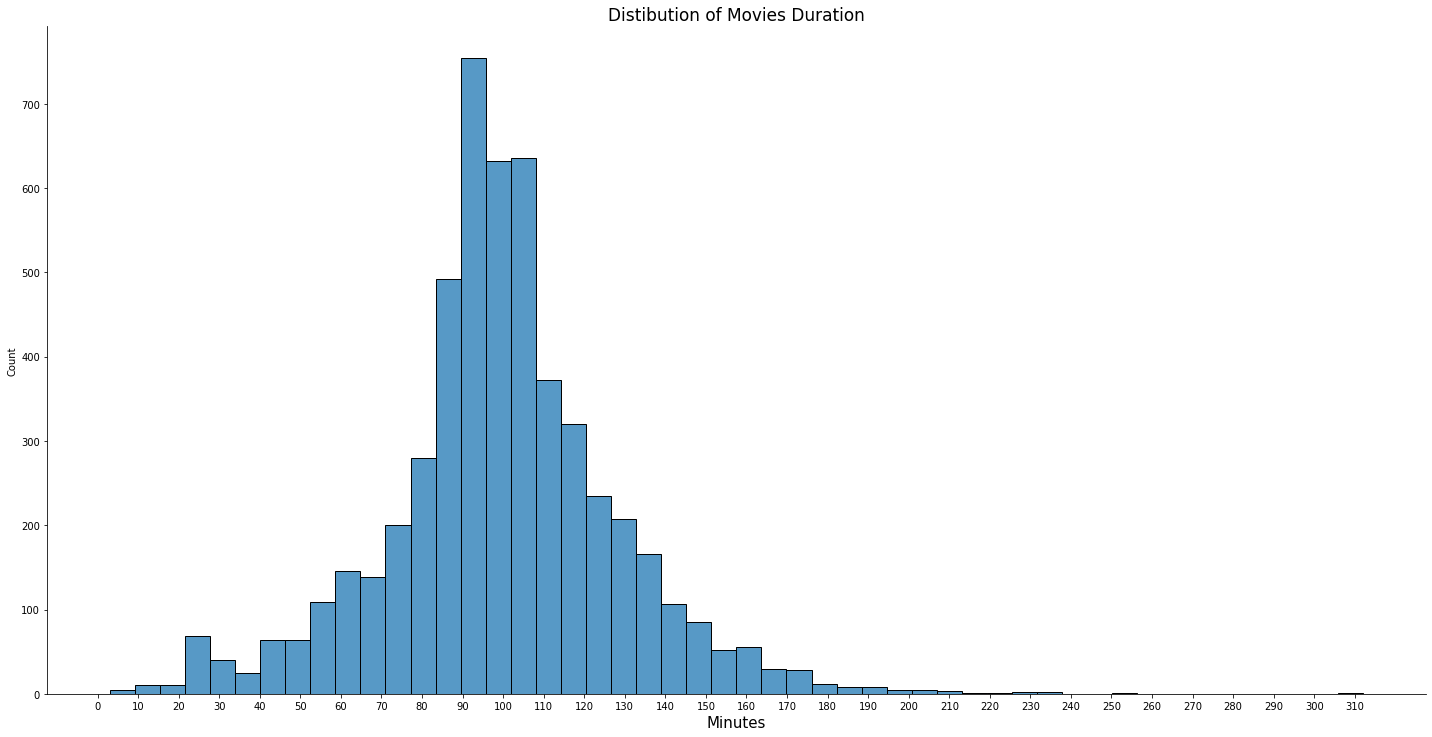

In [ ]:
netflix = data[data['type'] == 'Movie'].loc[:,['show_id','duration']].copy()
cast = (netflix['duration'].to_list())

newlist = []
for genre in cast:
    newlist.append(int(genre.split(' ')[0]))

country_list = pd.DataFrame({'Duration':newlist, 'id':np.arange(0, len(newlist), 1)})

sns.displot(x = 'Duration', data = country_list, kind = 'hist', height = 10, aspect = 2, bins = 50)
plt.title('Distibution of Movies Duration', size = 17)
plt.xlabel('Minutes', size = 15)
plt.xticks(ticks = np.arange(0, country_list.Duration.max()+1, 10))
plt.show()

### Observation :-

Most movies on Netflix have a durationrange from 90 to 110 minutes

### Duration of TV Shows on Netflix

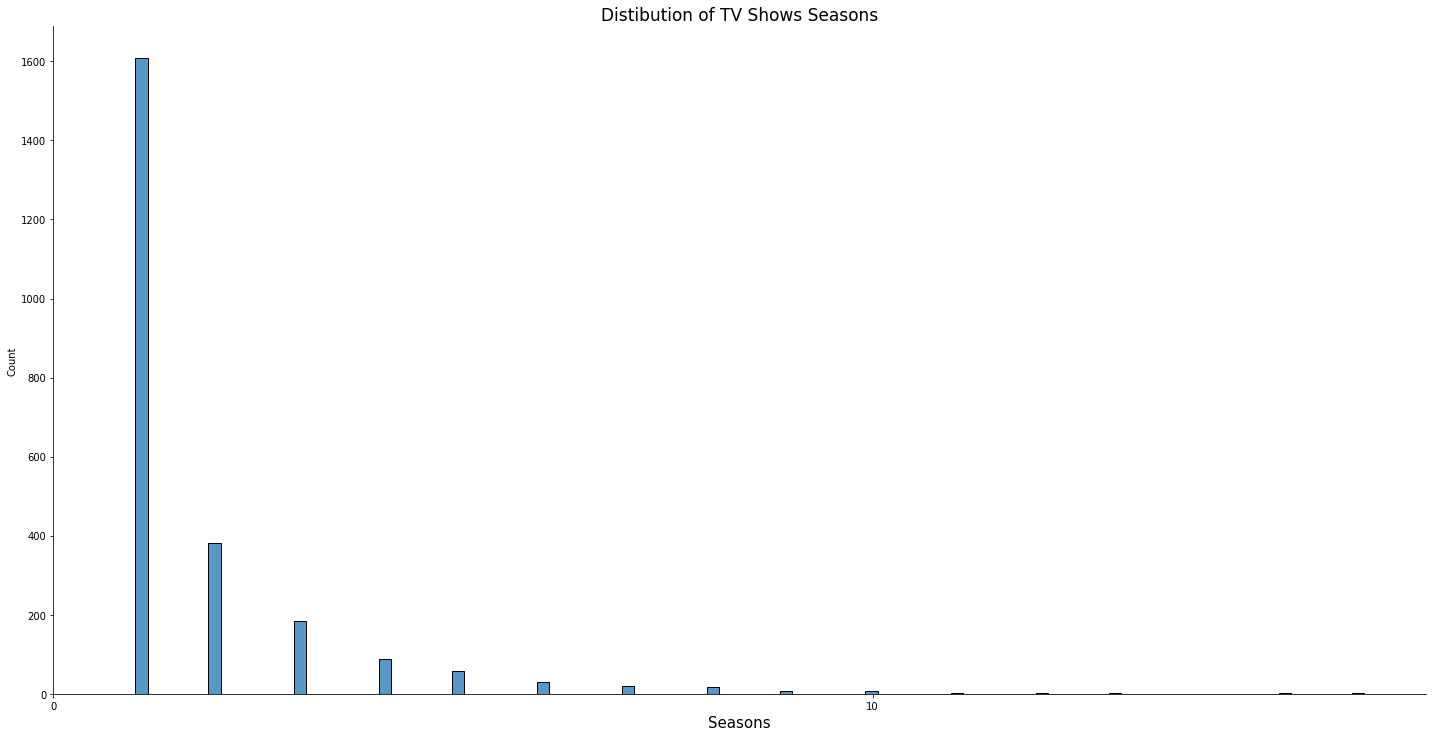

In [ ]:
netflix = data[data['type'] != 'Movie'].loc[:,['show_id','duration']].copy()
cast = (netflix['duration'].to_list())

newlist = []
for genre in cast:
    newlist.append(int(genre.split(' ')[0]))

country_list = pd.DataFrame({'Seasons':newlist, 'id':np.arange(0, len(newlist), 1)})

sns.displot(x = 'Seasons', data = country_list, kind = 'hist', height = 10, aspect = 2)
plt.title('Distibution of TV Shows Seasons', size = 17)
plt.xlabel('Seasons', size = 15)
plt.xticks(ticks = np.arange(0, country_list.Seasons.max()+1, 10))
plt.show()

### Observations :-

Most TV shows on Netflix have a span of 1 season only

### Understanding content producd in different countries

In [ ]:
#netflix = data[data['country'] != 'unknown country'].loc[:,['show_id','title','listed_in','Genres']].copy()
netflix = data[data['country'] != 'unknown country'].loc[:,['show_id','title','country','listed_in','Genres']].copy()

In [ ]:
# String type to list
def operation(row, string):
    return row[string].split(', ')

netflix['listed_in'] = netflix.apply(lambda x : operation(x,'listed_in'), axis = 1)
netflix['country'] = netflix.apply(lambda x : operation(x,'country'), axis = 1)

In [ ]:
netflix = netflix.explode('Genres').explode('country')

In [ ]:
netflix = netflix.groupby(['country','Genres']).agg({'show_id':'count'}).reset_index()

In [ ]:
def selectindex(row, attribute, list):
    b = row[attribute]
    boolean = b in list
    return boolean

index = netflix.apply(lambda x: selectindex(x, 'country',top10countries), axis = 1)
newindex = netflix[index].apply(lambda x: selectindex(x, 'Genres',top15genres), axis = 1)

In [ ]:
newdata = netflix[index][newindex]

In [ ]:
gyr = ['#ff00ff','#00bfff',
    '#7f0000','#483d8b','#f0e68c','#b03060','#ff7f50','#00ff00',
    '#ee82ee','#00ffff','#1e90ff','#9acd32','#00fa9a','#ffb6c1',
    '#8b008b','#b8860b','#00008b','#ffd700','#008000','#008b8b','#e0ffff',
    '#000000','#ff0000','#0000ff','#556b2f']

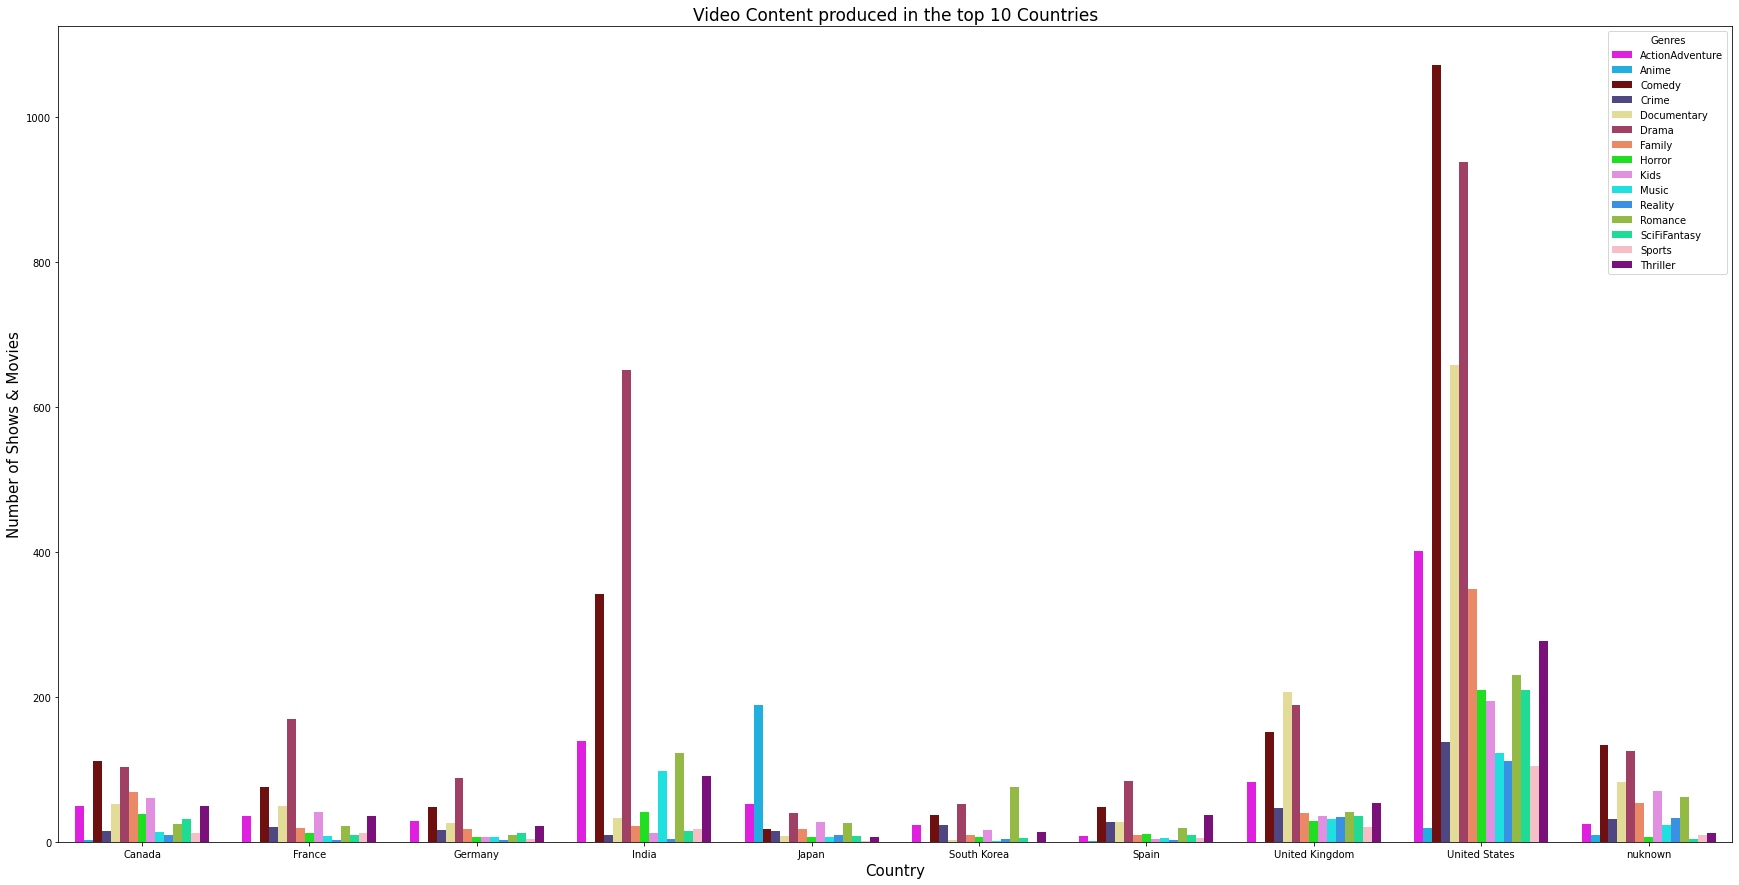

In [ ]:
netflix = plt.figure(figsize = (30,15))
sns.barplot(x = newdata['country'], y = newdata['show_id'], hue = newdata['Genres'], palette = sns.color_palette(gyr[:23]))
plt.title('Video Content produced in the top 10 Countries', size = 17)
plt.xlabel('Country', size = 15)
plt.ylabel('Number of Shows & Movies', size = 15)
plt.show()

Observations :-

Drama is the most produced genre in a lot of Non-English speaking countries.

Comedy is the most produced genre in English speaking countries like United States of America and United Kingdom and Canada.

Drama and Comedy are the most produced genres in the top countries with exceptions of Japan and South Korea.

Japan is the biggest producer of Anime. Anime is also the most produced in genre in Japan

Most South Korean content are from the Romance genre.

Documentaries are mainly produced in United Kingdom and United States of America.

### Netflix Been Focusing Increasingly on TV Shows as compared to movies.

In [ ]:
content = data.loc[:,['title','date_added','release_year','duration','type']].dropna().copy()

In [ ]:
content['date_added'] = content['date_added'].dt.year

In [ ]:
def season(row):
    release = row['release_year']
    added = row['date_added']
    if row['type'] == 'TV Show':
        season = int(row['duration'][0])
        b = []
        
        for i in range(1, season + 1):
            if i ==1:
                b.append(release)
            else:
                b.append(b[-1]-1)
        netflix = b

    else:
        netflix = []
        netflix.append(row['release_year'])

    return netflix

content['Released Years'] = content.apply(lambda x: season(x), axis=1)

In [ ]:
compare = content.explode('Released Years')

In [ ]:
tv = compare[compare['type'] == 'TV Show'].groupby(['date_added']).agg(count = ('title','count')).reset_index()
tv['type'] = 'TV'
movie = compare[compare['type'] != 'TV Show'].groupby(['date_added']).agg(count = ('title','count')).reset_index()
movie['type'] = 'Movie'

In [ ]:
df = pd.concat([tv,movie], axis = 0)

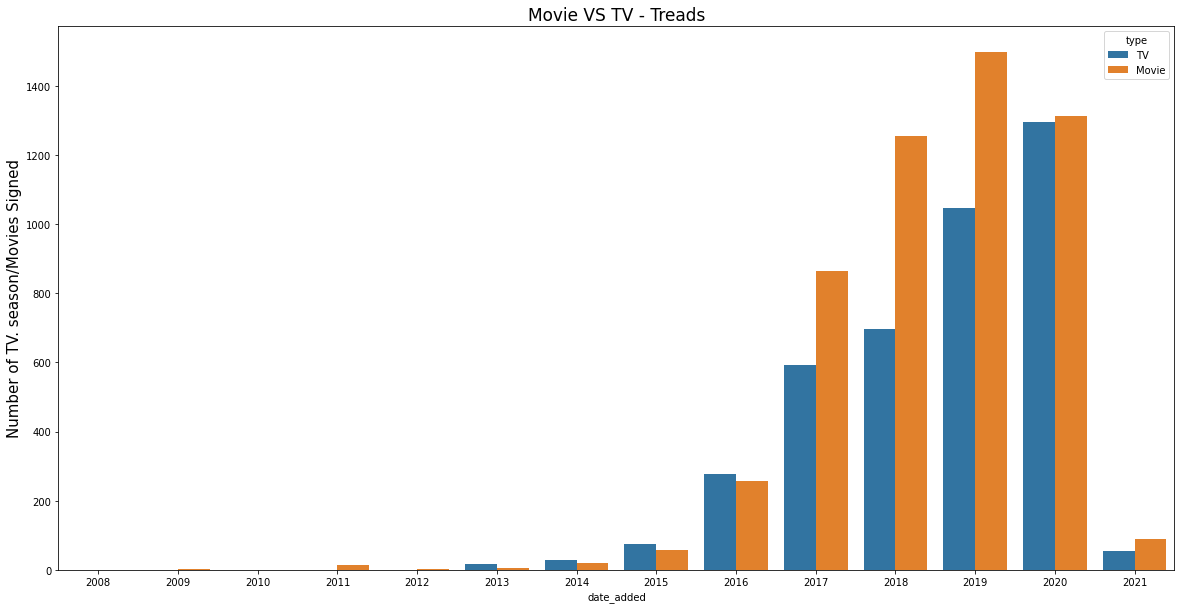

In [ ]:
plt.figure(figsize = (20,10))
sns.barplot(x = 'date_added', y = 'count', hue = 'type', data = df)
plt.title('Movie VS TV - Treads', size = 17)
plt.ylabel('Number of TV. season/Movies Signed', size = 15)
plt.show()

Observations :-
 
1)The above graph depicts seasons of TV shows signed vs the movies signed

2)This distinction gives contacts as TV shows require recurring investment for each seasons. So the TV numbers have been increased in accordance to the seasons. As they were considered as one entity earlier

3)We can observe that TV shows signed have been higher than movies in 2016. While the the movies signed have been higher, it is blatantly visible that the TV shows signed per year is catching up to the movies signed by the year

In [ ]:
tv = compare[compare['type'] == 'TV Show'].groupby(['Released Years']).agg(count = ('title','count')).reset_index()
tv['type'] = 'TV'
movie = compare[compare['type'] != 'TV Show'].groupby(['Released Years']).agg(count = ('title','count')).reset_index()
movie['type'] = 'Movie'

In [ ]:
df = pd.concat([tv, movie], axis = 0)

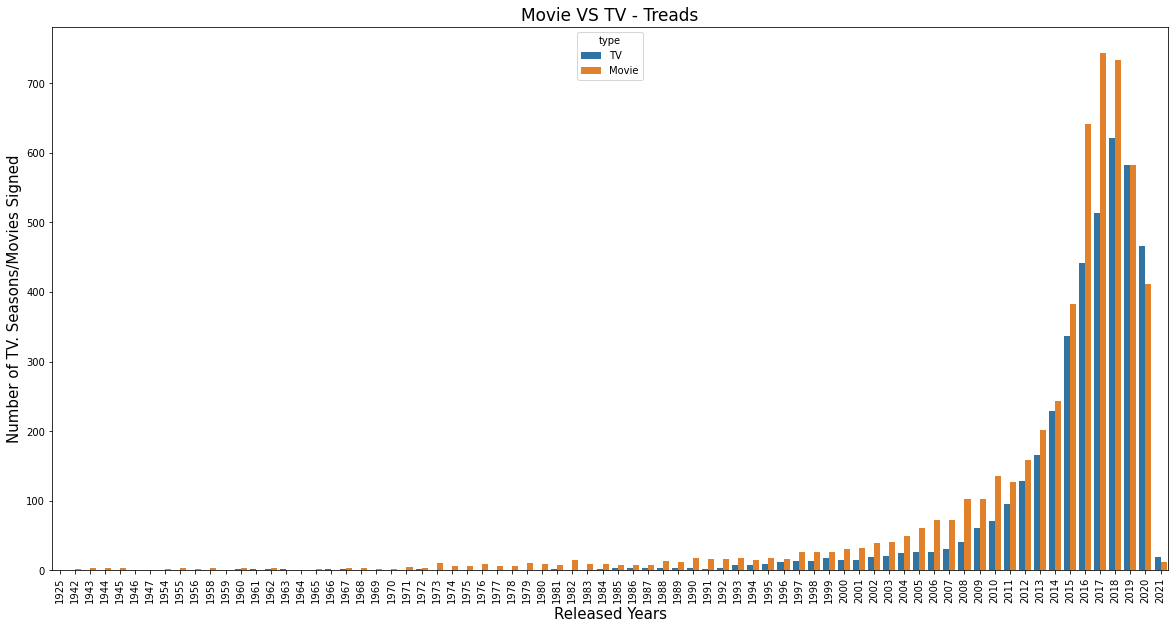

In [ ]:
plt.figure(figsize = (20,10))
sns.barplot(x = 'Released Years', y = 'count', hue = 'type', data = df)
plt.title('Movie VS TV - Treads', size = 17)
plt.xlabel('Released Years', size = 15)
plt.xticks(rotation = 90)
plt.ylabel('Number of TV. Seasons/Movies Signed', size = 15)
plt.show()

Observations :-

The above graph depicts an estimation of seasonal TV show and Movie release date per each year. 

We make a general assumption that each show releases a season yearly which is often the case for most TV shows.
There are certainly exemptions. Eg. Ozark was released in years 2017, 2018, 2020 and 2022.

We can observe that TV releases outnumbering movies from 2010. It is a known fact that each show contains multiple episodes, hence we can confidently say that significant amount of video content is being enlisted under TV shows from 2010.

Years 2019, 2020 and 2021 see multi-episode TV seasons outnumbering movies signed per year.

Text Preprocessing

This process involves converting the 'Description' of the show/movie into a machine interprettable form. Here we convert all text to lower case, remove punctuations and remove irrelevant words (so that only words that provide context are retained). Here similar words are unified to save memory and processing time as well. Individual words and group of words (n grams) are also collected to extract context related details.

In [ ]:
# Converting date_added column to datetime
data['date_added'] = pd.to_datetime(data['date_added'])

In [ ]:
# year
data['added_year'] = data['date_added'].dt.year

# month
data['added_month'] = data['date_added'].dt.month

# day
data['added_day'] = data['date_added'].dt.day

Text(0.5, 1.0, 'Daywise content addition')

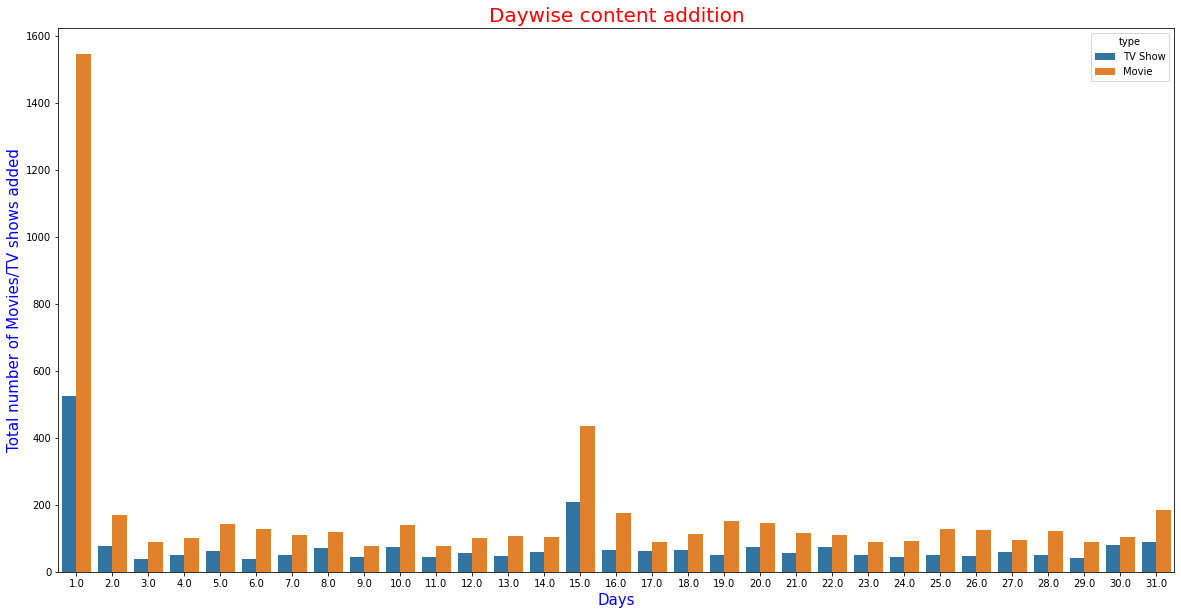

In [ ]:
plt.figure(figsize = (20,10))
sns.countplot(x='added_day', hue='type', data=data)
plt.xlabel('Days', size=15, color='blue')
plt.ylabel('Total number of Movies/TV shows added', size=15, color='blue')
plt.title("Daywise content addition", size=20, color='red')

In [ ]:
data.added_month.value_counts()

12.0    833
10.0    785
1.0     757
11.0    738
3.0     669
9.0     619
8.0     618
4.0     601
7.0     600
5.0     543
6.0     542
2.0     472
Name: added_month, dtype: int64

Text(0.5, 1.0, 'Monthwise content addition')

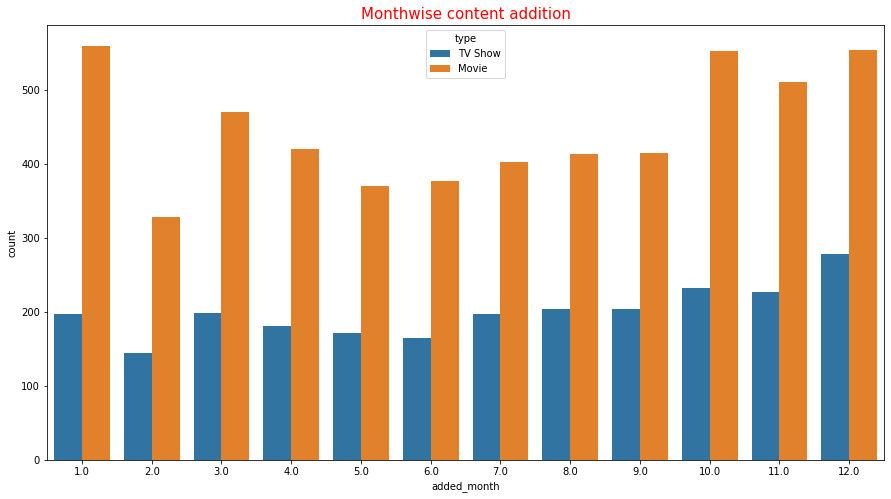

In [ ]:
# Plotting a countplot for getting better insights from monthwise addition
plt.figure(figsize = (15,8)) 
sns.countplot(x='added_month', hue = 'type', data = data)
plt.title("Monthwise content addition", size = 15, color='red')

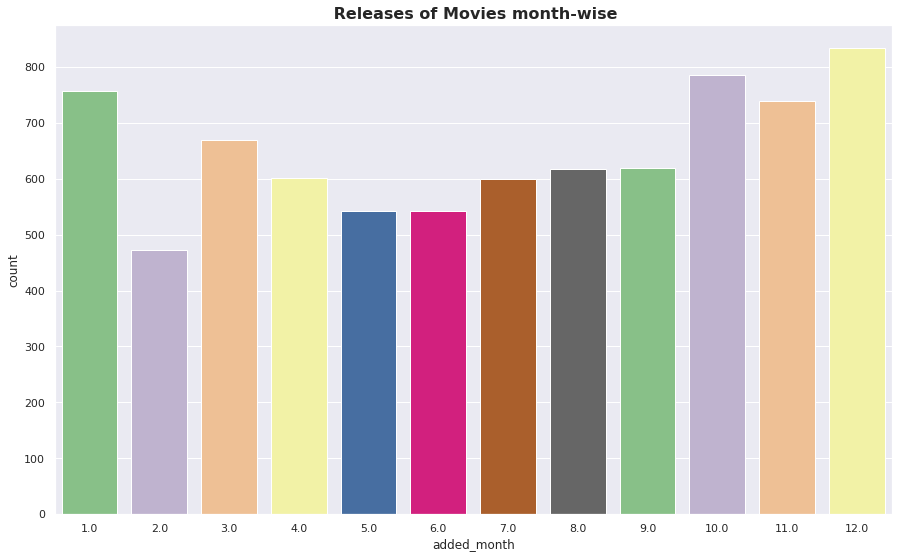

In [ ]:
# Release of movies month-wise
sns.set(rc={'figure.figsize':(15,9)})
sns.countplot(x = 'added_month', data = data, palette = "Accent")

plt.title(' Releases of Movies month-wise', size = '16', fontweight = "bold")    
plt.show()

Text(0.5, 1.0, "Recent year Netflix's Uploads")

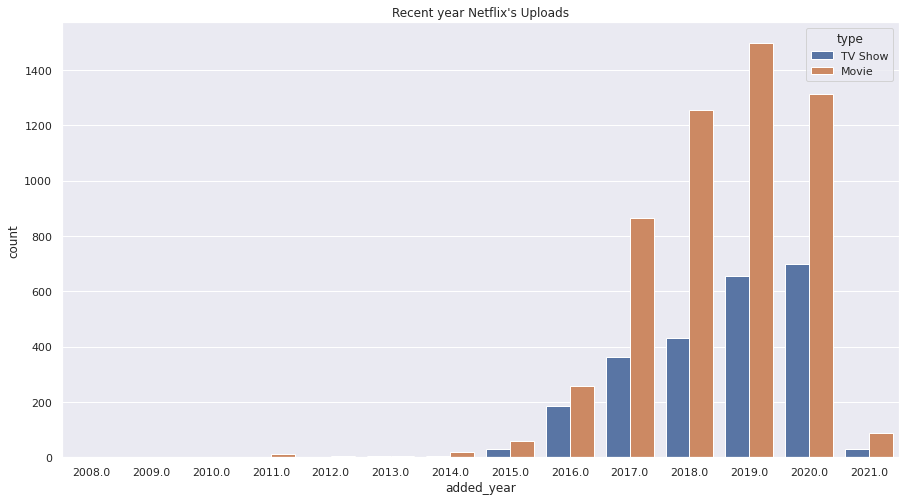

In [ ]:
#Plotting a countplot
plt.figure(figsize = (15,8))
sns.countplot(x='added_year', hue='type', data=data)
plt.title("Recent year Netflix's Uploads")

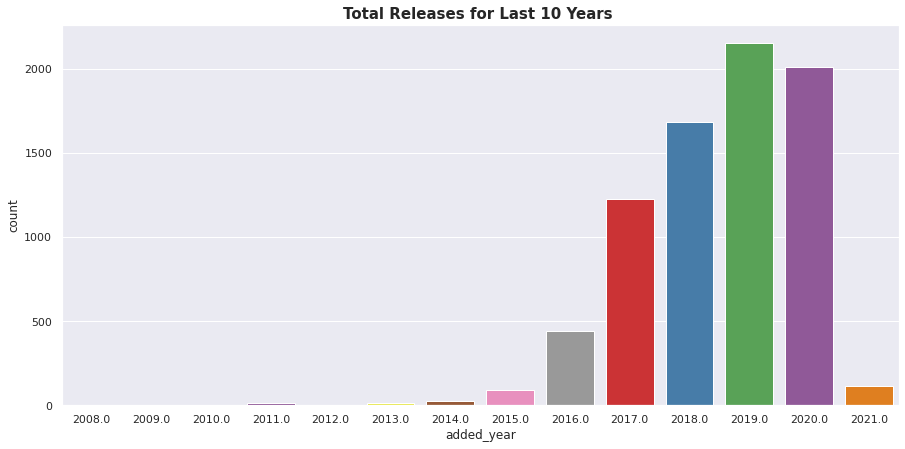

In [ ]:
# Total release for last 10 years
sns.set(rc={'figure.figsize':(15,7)})
sns.countplot(x='added_year',data=data, palette="Set1")

plt.title('Total Releases for Last 10 Years ',size='15',fontweight="bold")    
plt.show()


In [ ]:
 # counting all type ratings
data.rating.value_counts().reset_index().rename(columns={'index':'Rating','rating':'Count'})

,Rating,Count
0,TV-MA,2863
1,TV-14,1931
2,TV-PG,806
3,R,665
4,PG-13,386
5,TV-Y,280
6,TV-Y7,271
7,PG,247
8,TV-G,194
9,NR,84


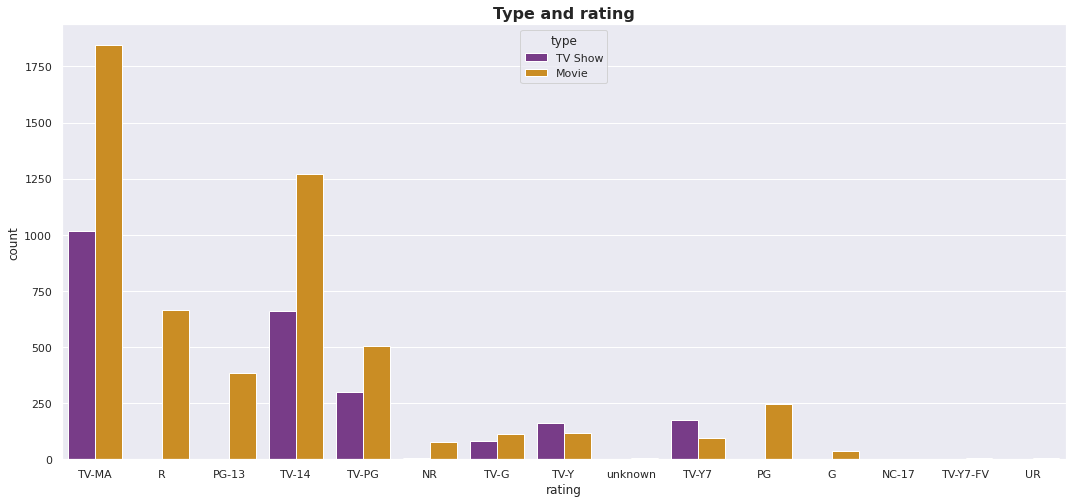

In [ ]:
# Rating
plt.figure(figsize=(18,8))
sns.countplot(x = 'rating', hue = 'type', data = data, palette = "CMRmap")
plt.title('Type and rating', size = '16', fontweight = "bold")
plt.show()

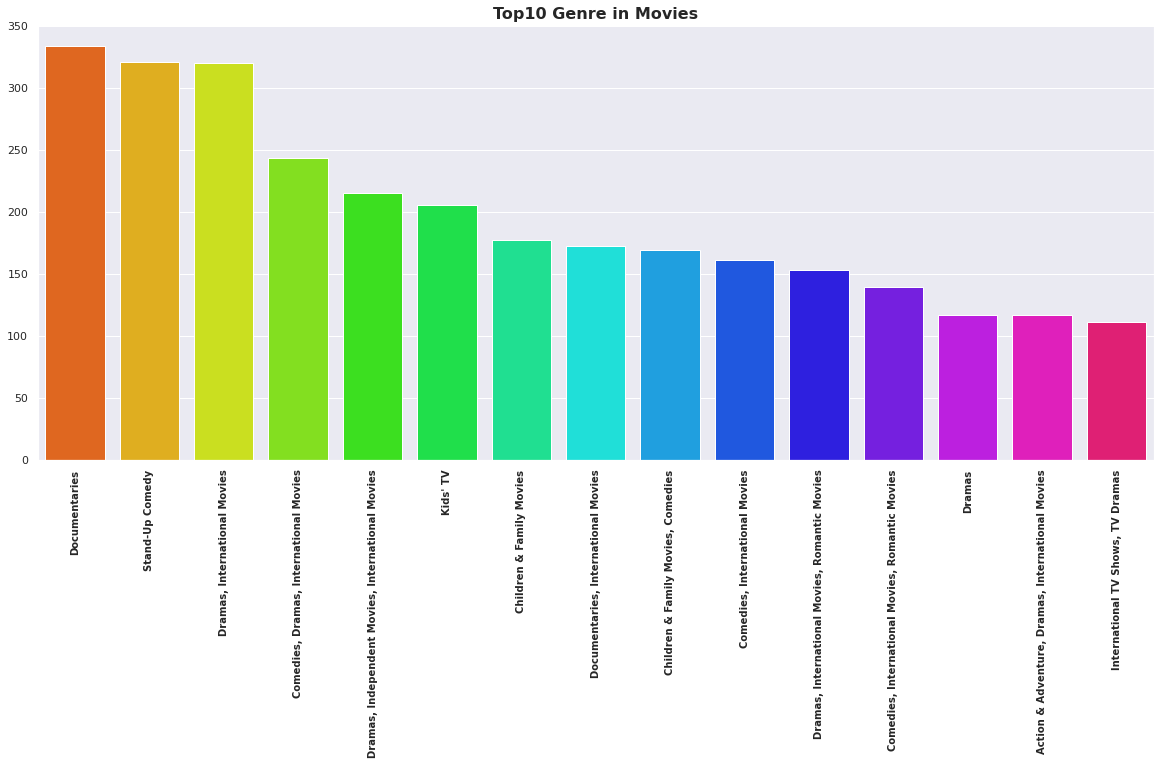

In [ ]:
# Top 10 Genre in movies
plt.figure(figsize=(20,8))
sns.barplot(x = data["listed_in"].value_counts().head(15).index,
            y = data["listed_in"].value_counts().head(15).values,palette="hsv")
plt.xticks(rotation=90, fontsize = 10, fontweight = "bold")
plt.title("Top10 Genre in Movies", size = '16', fontweight = "bold")
plt.show()

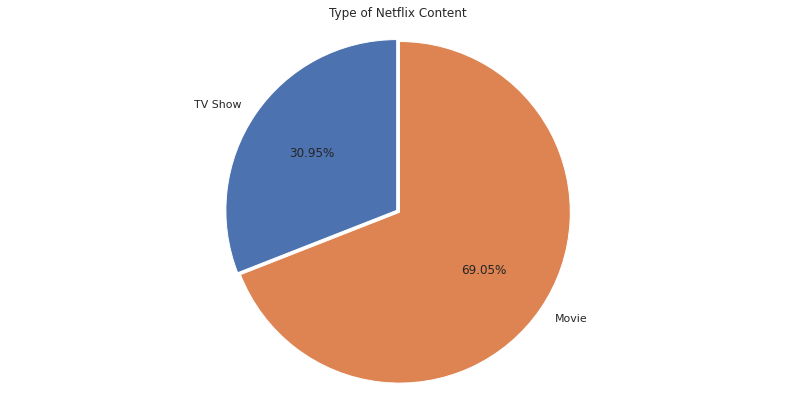

In [ ]:
#Plotting pie chart on type feature
plt.figure(figsize = (14, 7))
labels=['TV Show', 'Movie']
plt.pie(data['type'].value_counts().sort_values(),labels = labels,
        explode = [0.01,0.01], autopct = '%1.2f%%', startangle = 90)
plt.title('Type of Netflix Content')
plt.axis('equal')
plt.show()